In [1]:
#change theta and momentum would cause change in x, Q2, z, Pt, then change the stat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_average(value1,error1,value2,error2):
    sum_mean = value1/error1**2+value2/error2**2
    sum_sigma = 1/error1**2+1/error2**2
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
#def Get_ratio_error(value1,error1,value2,error2):
#    return value1/value2,(value1/value2)*math.sqrt((error1/value1)**2+(error2/value2)**2)
#this is actually same method
def Get_ratio_error(value1,error1,valuem,errorm):
    return abs(value1-valuem)/valuem,math.sqrt(error1**2+errorm**2)/valuem

In [4]:

df_pip_default = pd.read_csv('acc_results/results_xQ2zPt/simenhanced_try1.dat',delim_whitespace=True)
df_pip_default.head()



,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.142247,-1.252427,0.476700,0.312118,1.375644,0.067455,FUUT,0.196225,0.000317,0.0,0.0,neutron,pi+,solid,0.000317
1,1,11.0,0.132158,2.581119,0.501810,0.312047,1.346090,0.071153,FUUT,0.199455,0.000454,0.0,0.0,neutron,pi+,solid,0.000454
2,2,11.0,0.108415,-2.894188,0.581624,0.312023,1.276949,0.157035,FUUT,0.181383,0.000316,0.0,0.0,neutron,pi+,solid,0.000316
3,3,11.0,0.113519,-2.378572,0.562110,0.312053,1.290869,0.157797,FUUT,0.180719,0.000314,0.0,0.0,neutron,pi+,solid,0.000314
4,4,11.0,0.129655,-1.739990,0.510194,0.312016,1.337968,0.159040,FUUT,0.177468,0.000318,0.0,0.0,neutron,pi+,solid,0.000318


In [5]:
df_pip_dacc = pd.read_csv('acc_results/results_xQ2zPt/simenhanced_try1_dacc.dat',delim_whitespace=True)
df_pip_dacc.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.144413,-1.225094,0.468712,0.312109,1.385839,0.067231,FUUT,0.196753,0.000304,0.0,0.0,neutron,pi+,solid,0.000304
1,1,11.0,0.133740,2.581079,0.494341,0.312060,1.355064,0.070798,FUUT,0.200394,0.000442,0.0,0.0,neutron,pi+,solid,0.000442
2,2,11.0,0.109651,-2.894359,0.573060,0.312039,1.286708,0.156793,FUUT,0.182519,0.000313,0.0,0.0,neutron,pi+,solid,0.000313
3,3,11.0,0.114839,-2.377437,0.553973,0.312051,1.301040,0.157635,FUUT,0.181668,0.000311,0.0,0.0,neutron,pi+,solid,0.000311
4,4,11.0,0.131309,-1.736742,0.502314,0.312024,1.347170,0.158801,FUUT,0.178352,0.000310,0.0,0.0,neutron,pi+,solid,0.000310


In [6]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45]
Q2_cuts=[1,1.5,2,2.5,3]
#Q2_cuts=[3,4,5,6,8]
xbj_cuts=[0,0.25]
#xbj_cuts=[0.25,0.4]
#xbj_cuts=[0.4,0.7]
PhT_cuts = [0.1,0.2]
#PhT_cuts = [0.1,0.2]
#PhT_cuts = [0.2,0.4]
#PhT_cuts=[0.2,0.6]
#PhT_cuts=[0.2,0.4]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-4*PI/5,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
phih_bins =[-PI,-0.9*PI,-0.8*PI,-0.7*PI,-0.6*PI,-0.5*PI,-0.4*PI,-0.3*PI,-0.2*PI,-0.1*PI,0,0.1*PI,0.2*PI,0.3*PI,0.4*PI,0.5*PI,0.6*PI,0.7*PI,0.8*PI,0.9*PI,PI]
#df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[(df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT8_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT8_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_pip_default_xPt = df_pip_default[(df_pip_default['x']>xbj_cuts[0])&(df_pip_default['x']<xbj_cuts[1])&(df_pip_default['pT']>PhT_cuts[0])&(df_pip_default['pT']<PhT_cuts[1])]
df_pip_dacc_xPt = df_pip_dacc[(df_pip_dacc['x']>xbj_cuts[0])&(df_pip_dacc['x']<xbj_cuts[1])&(df_pip_dacc['pT']>PhT_cuts[0])&(df_pip_dacc['pT']<PhT_cuts[1])]


3.141592653589793


25 25
23 23
13 13
5 5
17 17
17 17
11 11
4 4
13 13
13 13
8 8
3 3


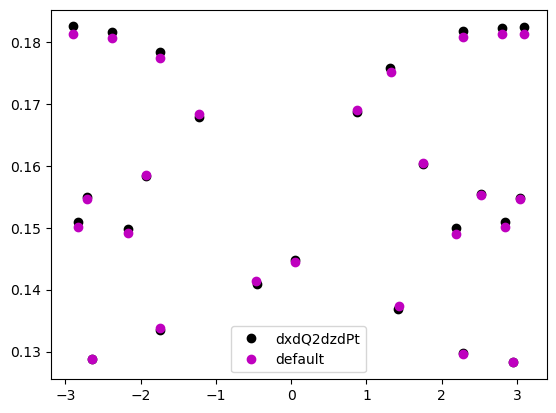

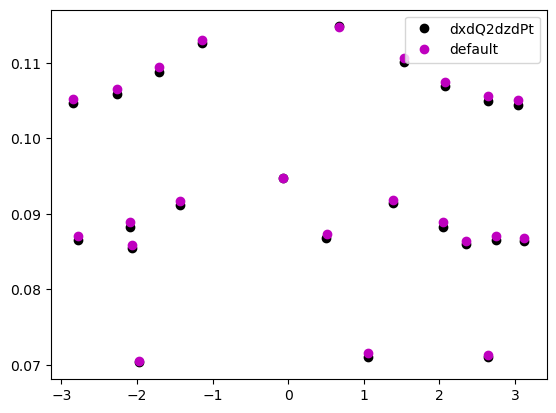

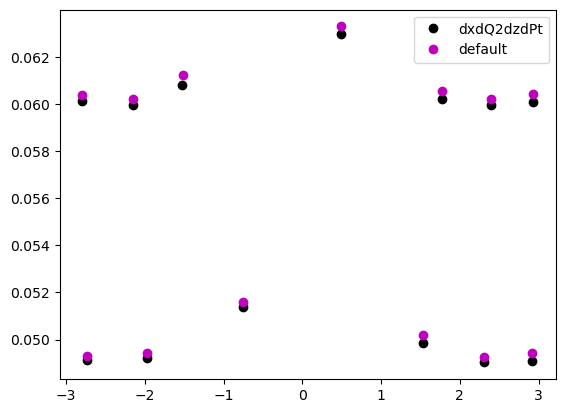

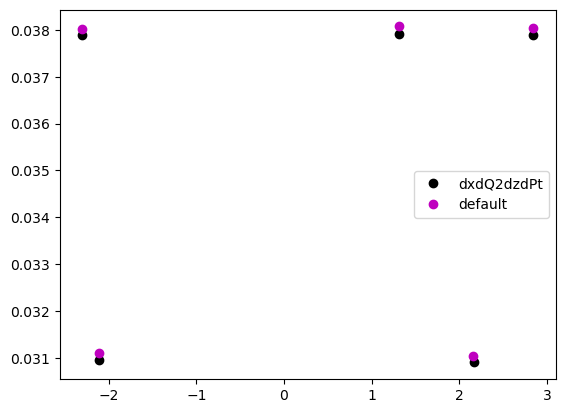

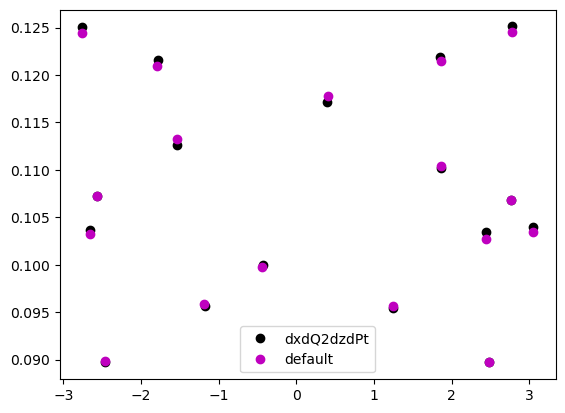

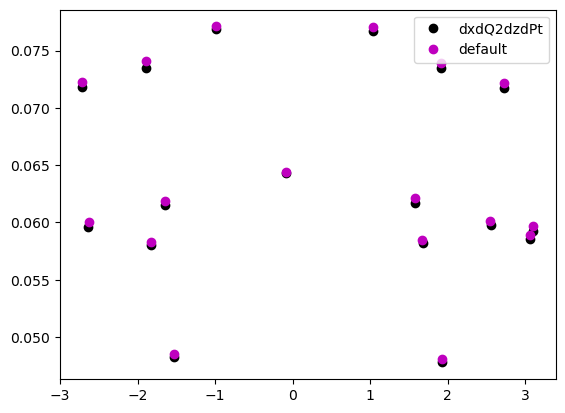

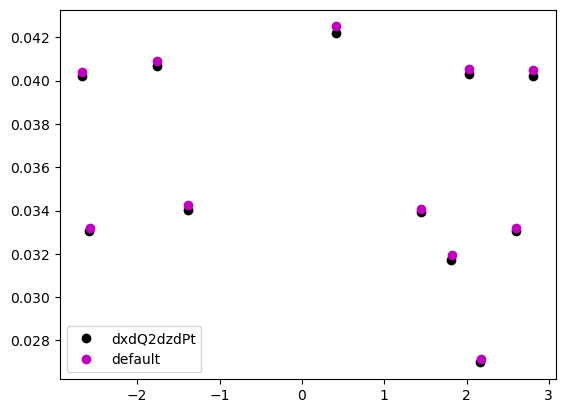

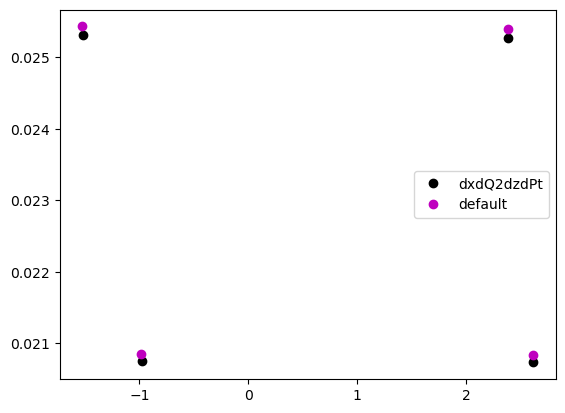

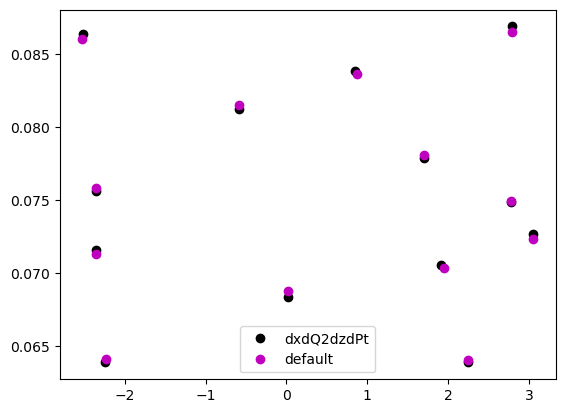

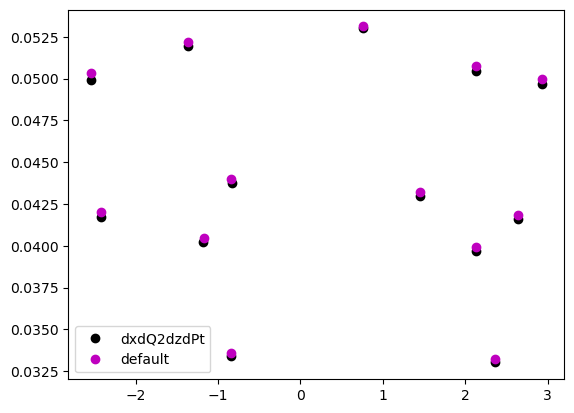

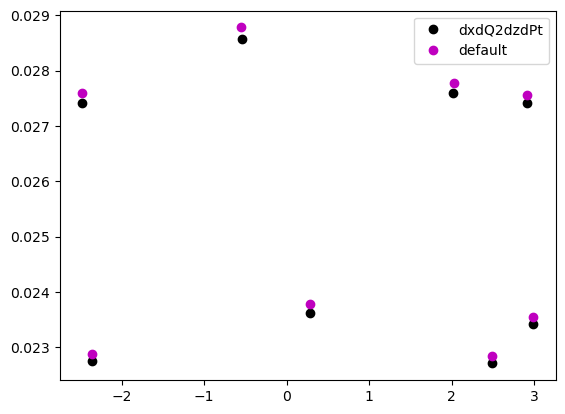

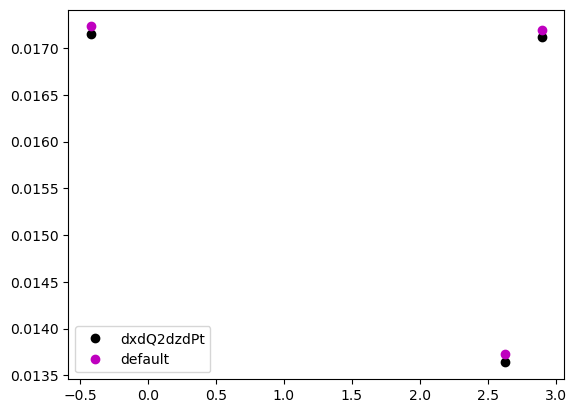

In [7]:
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_pip_default_xPtzQ2=df_pip_default_xPt[(df_pip_default_xPt['z']>z_cuts[i_z-1])&(df_pip_default_xPt['z']<z_cuts[i_z])&(df_pip_default_xPt['Q2']>Q2_cuts[i_Q2-1])&(df_pip_default_xPt['Q2']<Q2_cuts[i_Q2])]
        df_pip_dacc_xPtzQ2=df_pip_dacc_xPt[(df_pip_dacc_xPt['z']>z_cuts[i_z-1])&(df_pip_dacc_xPt['z']<z_cuts[i_z])&(df_pip_dacc_xPt['Q2']>Q2_cuts[i_Q2-1])&(df_pip_dacc_xPt['Q2']<Q2_cuts[i_Q2])]
                
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_dacc = df_pip_dacc_xPtzQ2['phih'].to_list()
        Fuu_dacc = df_pip_dacc_xPtzQ2['value'].to_list()
        phih_default = df_pip_default_xPtzQ2['phih'].to_list()
        Fuu_default = df_pip_default_xPtzQ2['value'].to_list()
        print(len(phih_dacc),len(phih_default))
        plt.plot(phih_dacc,np.asarray(Fuu_dacc),'ko',label='dxdQ2dzdPt')
        
        plt.plot(phih_default,np.asarray(Fuu_default),'mo',label='default')
       
        plt.legend()
        #for i_phi in np.asarray(phihs):
        #    print(i_phi)
        #for i_phih in phih_bins:
            #plt.axvline(x=i_phih)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

25 25
-2.894359 -2.894188
0.182519019654314 0.1813834848147255
-2.377437 -2.378572
0.1816683145546473 0.1807192078391499
-1.736742 -1.73999
0.1783523133213732 0.1774679856017955
1.306447 1.331127
0.1757681128839467 0.1751558400542156
2.277691 2.278565
0.1817287350778457 0.1807443912172575
2.80154 2.800753
0.1823315467680345 0.1812957329322614
3.095184 3.095349
0.1823821700853603 0.1812401915337393
-2.834798 -2.833084
0.1508728734018429 0.1501884973890545
-2.168152 -2.170805
0.1498147576549995 0.149072039165611
0.057264 0.052816
0.1447984530639698 0.1444893859456835
2.190886 2.192435
0.1499730617590606 0.1490232435654133
2.842744 2.842559
0.150919670740594 0.1501960811878449
-2.711135 -2.711983
0.1549837781241914 0.1546625934313482
-1.922738 -1.924671
0.158298046222953 0.1585955569458049
-1.223403 -1.223457
0.1679150625181494 0.1683465400031682
0.871174 0.872021
0.1686242637489794 0.1690620911064082
1.7504 1.751218
0.1603003916697582 0.1604417439349162
2.520655 2.520062
0.15548309747803

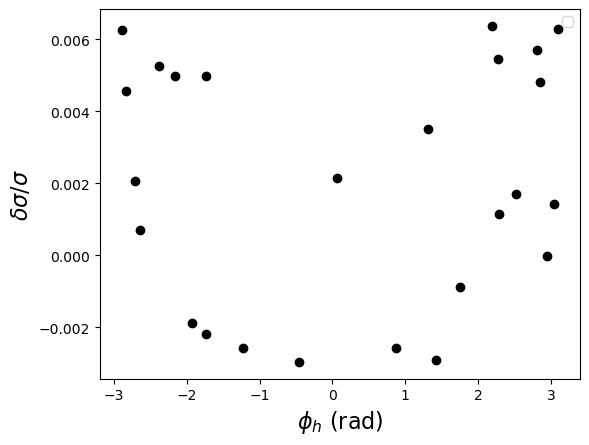

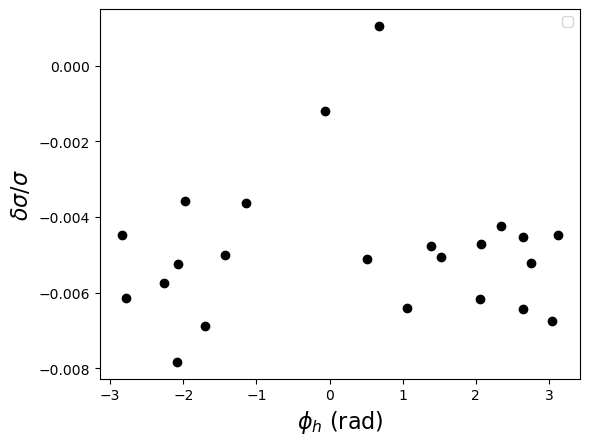

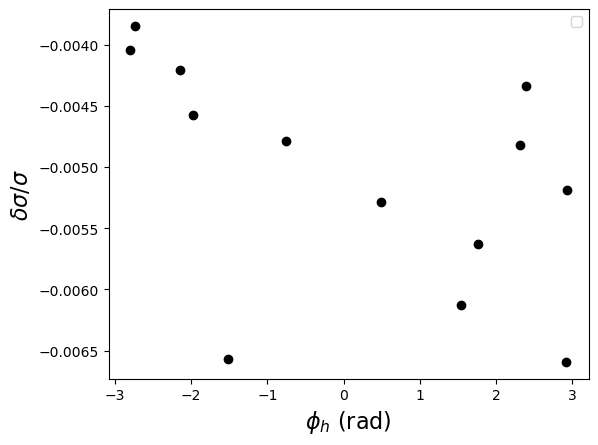

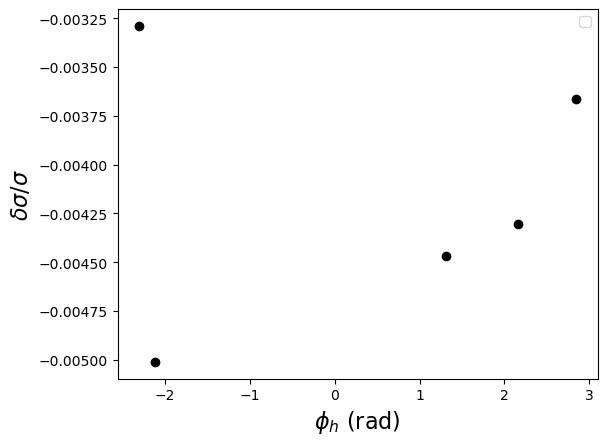

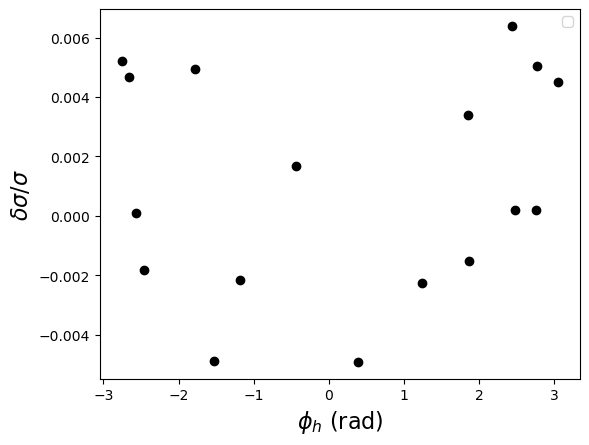

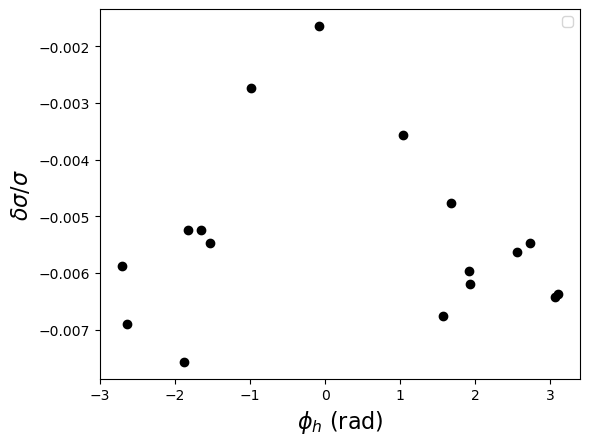

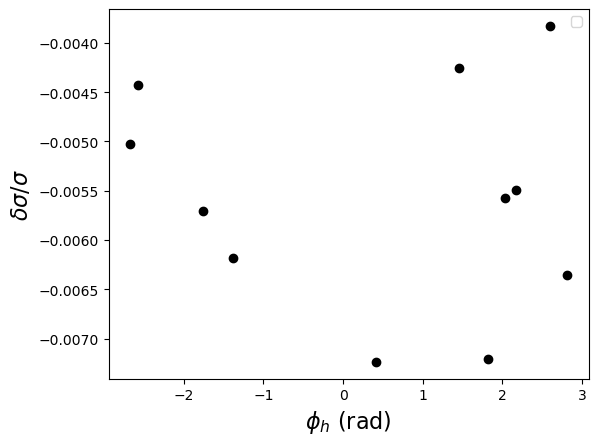

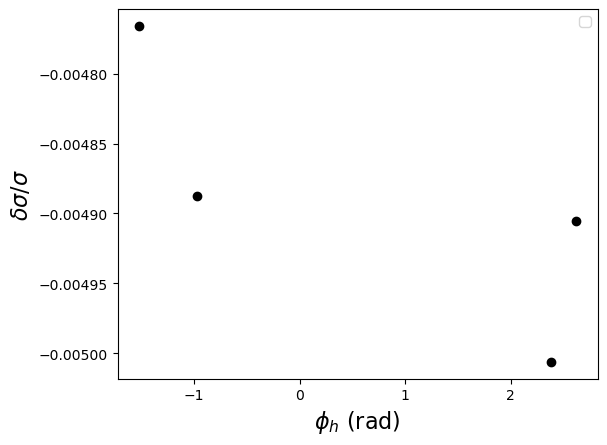

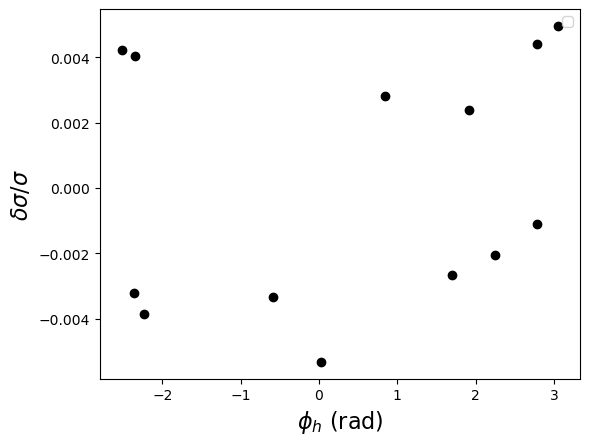

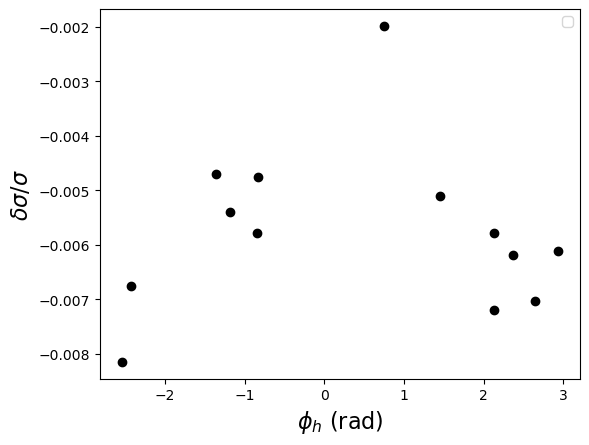

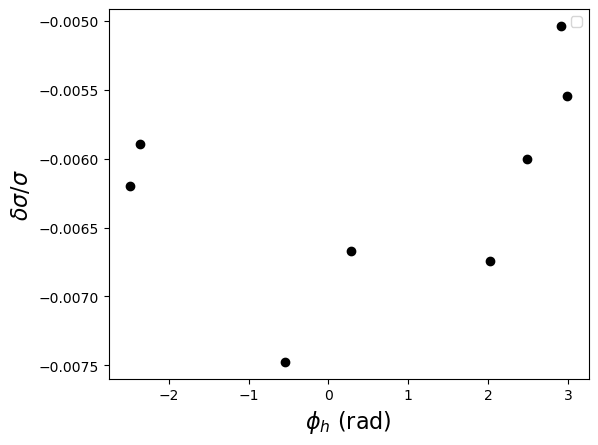

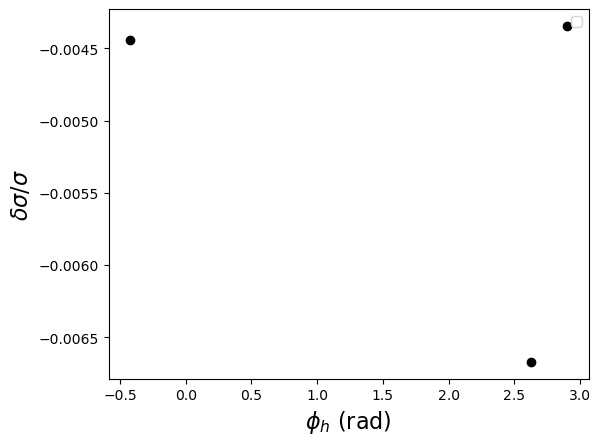

In [8]:
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_pip_default_xPtzQ2=df_pip_default_xPt[(df_pip_default_xPt['z']>z_cuts[i_z-1])&(df_pip_default_xPt['z']<z_cuts[i_z])&(df_pip_default_xPt['Q2']>Q2_cuts[i_Q2-1])&(df_pip_default_xPt['Q2']<Q2_cuts[i_Q2])]
        df_pip_dacc_xPtzQ2=df_pip_dacc_xPt[(df_pip_dacc_xPt['z']>z_cuts[i_z-1])&(df_pip_dacc_xPt['z']<z_cuts[i_z])&(df_pip_dacc_xPt['Q2']>Q2_cuts[i_Q2-1])&(df_pip_dacc_xPt['Q2']<Q2_cuts[i_Q2])]
                
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_dacc = df_pip_dacc_xPtzQ2['phih'].to_list()
        Fuu_dacc = df_pip_dacc_xPtzQ2['value'].to_list()
        phih_default = df_pip_default_xPtzQ2['phih'].to_list()
        Fuu_default = df_pip_default_xPtzQ2['value'].to_list()
        print(len(phih_dacc),len(phih_default))
        phih_daccs = []
        phih_defaults = []
        dFuu_daccs = []
        dFuu_defaults = []
        for i_phi in range(0,len(Fuu_dacc)):
            #print(i_phi)
            #print(phih_dacc[i_phi],phih_kT4[i_phi])
            print(phih_dacc[i_phi],phih_default[i_phi])
            iFuu_dacc = Fuu_dacc[i_phi]
            iFuu_default = Fuu_default[i_phi]
            dFuu_dacc=(iFuu_dacc-iFuu_default)/iFuu_default            
            print(iFuu_dacc,iFuu_default)
            phih_daccs.append(phih_dacc[i_phi])
            phih_defaults.append(phih_default[i_phi])
            dFuu_daccs.append(dFuu_dacc)
            
            
            
        print(r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]))
        print(r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]))      

        plt.plot(phih_daccs,np.asarray(dFuu_daccs),'ko')
        
        
        #plt.text(-0.03,-0.01,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]),fontsize=10)
        #plt.text(-0.03,-0.015,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]),fontsize=10)      

        plt.legend()
        plt.xlabel(r'$\phi_h$ (rad)',fontsize=16)
        plt.ylabel(r'$\delta \sigma/\sigma $',fontsize=16)
        plt.subplots_adjust(left=0.15)
        #plt.savefig('acc_results/acc_z_{}_Q2_{}.pdf'.format(i_z,i_Q2))
        #for i_phi in np.asarray(phihs):
        #    print(i_phi)
        #for i_phih in phih_bins:
            #plt.axvline(x=i_phih)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


25 25
-2.894359 -2.894188
0.000313 0.000316
-2.377437 -2.378572
0.000311 0.000314
-1.736742 -1.73999
0.00031 0.000318
1.306447 1.331127
0.000304 0.000315
2.277691 2.278565
0.000311 0.000316
2.80154 2.800753
0.000314 0.000316
3.095184 3.095349
0.000721 0.000726
-2.834798 -2.833084
0.000313 0.000317
-2.168152 -2.170805
0.000311 0.000316
0.057264 0.052816
0.000304 0.000317
2.190886 2.192435
0.000313 0.000317
2.842744 2.842559
0.000317 0.00032
-2.711135 -2.711983
0.00032 0.000317
-1.922738 -1.924671
0.000318 0.000315
-1.223403 -1.223457
0.000318 0.000317
0.871174 0.872021
0.000318 0.000318
1.7504 1.751218
0.000318 0.000315
2.520655 2.520062
0.000317 0.000314
3.045 3.044778
0.000682 0.000674
-2.645613 -2.645388
0.000319 0.000315
-1.740882 -1.741067
0.000318 0.000316
-0.454368 -0.460868
0.000317 0.000316
1.425267 1.426783
0.000316 0.000313
2.286013 2.285719
0.00032 0.000318
2.947515 2.947791
0.000514 0.000509
23 23
-2.843318 -2.843762
0.000319 0.000315
-2.264579 -2.263533
0.00032 0.000318
-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


13 13
-2.797153 -2.796905
0.0004 0.000396
-2.149189 -2.14984
0.000401 0.000397
-1.5236 -1.521131
0.000401 0.000395
0.492382 0.489739
0.000405 0.000397
1.768196 1.767586
0.000398 0.000394
2.390035 2.389991
0.000398 0.000395
2.928484 2.928562
0.000511 0.000507
-2.734905 -2.736082
0.000397 0.000395
-1.970632 -1.969903
0.000398 0.000395
-0.75421 -0.751004
0.000406 0.000396
1.534678 1.534926
0.000399 0.000393
2.310274 2.311608
0.000396 0.000393
2.919623 2.919328
0.000541 0.000536
5 5
-2.30219 -2.300868
0.000402 0.000394
1.315099 1.317041
0.000405 0.000395
2.83987 2.84133
0.000684 0.000673
-2.114175 -2.109271
0.000405 0.000396
2.163109 2.161109
0.00041 0.000401
17 17
-2.756925 -2.757114
0.000313 0.000316
-1.777317 -1.794099
0.000306 0.000316
1.846849 1.856997
0.000306 0.000313
2.76989 2.771407
0.000318 0.000322
-2.656713 -2.66024
0.000312 0.000316
-0.433759 -0.439359
0.000306 0.000317
2.437988 2.439559
0.000309 0.000314
3.046648 3.046571
0.000697 0.000705
-2.568008 -2.571333
0.000321 0.00031

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


11 11
-2.669106 -2.667948
0.000398 0.000395
-1.754894 -1.756545
0.000402 0.000397
0.413281 0.412211
0.000403 0.000394
2.031318 2.031443
0.000398 0.000395
2.80827 2.807846
0.000477 0.000474
-2.58064 -2.578543
0.000398 0.000394
-1.386601 -1.379491
0.000403 0.000398
1.453175 1.448938
0.000401 0.000395
2.601331 2.602149
0.000407 0.000402
1.816779 1.829288
0.00074 0.000717
2.168861 2.17578
0.00104 0.001002
4 4
-1.518189 -1.526064
0.000405 0.000393
2.382517 2.383481
0.000504 0.000493
-0.973324 -0.985027
0.000404 0.000397
2.615321 2.615883
0.000662 0.000647
13 13
-2.519633 -2.525874
0.00031 0.000314
0.845143 0.866963
0.000306 0.000316
2.787079 2.785964
0.0004 0.000405
-2.349143 -2.357286
0.000311 0.000317
1.91134 1.943361
0.000307 0.000316
3.049497 3.049675
0.000867 0.000881
-2.360317 -2.359242
0.000319 0.000315
-0.585048 -0.591705
0.000316 0.000316
1.703487 1.704846
0.000318 0.000316
2.780307 2.781237
0.000476 0.000471
-2.239746 -2.235479
0.00032 0.000317
0.019391 0.019593
0.000317 0.000316


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


13 13
-2.542502 -2.5424
0.000318 0.000317
-1.361452 -1.359962
0.000317 0.000316
0.754009 0.75448
0.000319 0.000317
2.131754 2.131361
0.000319 0.000316
2.93065 2.930688
0.000538 0.000535
-2.422853 -2.423819
0.000318 0.000315
-0.836188 -0.840405
0.000317 0.000317
1.454165 1.454095
0.000318 0.000317
2.64443 2.643415
0.000383 0.00038
-1.184702 -1.173918
0.000322 0.000317
2.127255 2.12801
0.000431 0.000425
-0.844429 -0.844724
0.000322 0.000316
2.362326 2.364032
0.00054 0.000533
8 8
-2.4789 -2.478208
0.000397 0.000394
-0.545234 -0.548233
0.000403 0.000395
2.020678 2.022942
0.000398 0.000396
2.907343 2.907515
0.000674 0.000668
-2.355202 -2.355127
0.000399 0.000395
0.278527 0.285929
0.000404 0.000397
2.485982 2.484688
0.000436 0.000432
2.984614 2.985146
0.003286 0.003142
3 3
-0.420144 -0.419633
0.000404 0.000397
2.898777 2.898715
0.001067 0.001043
2.624878 2.626134
0.000696 0.00069


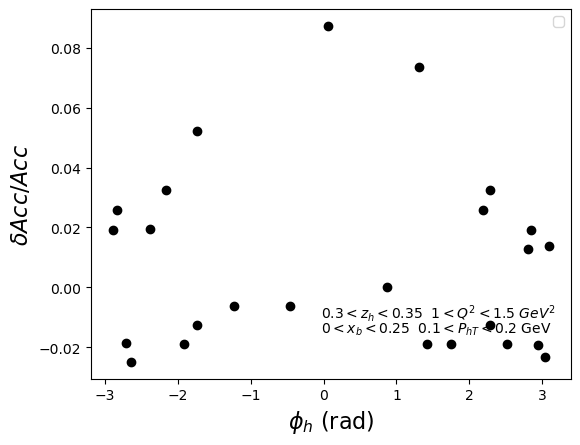

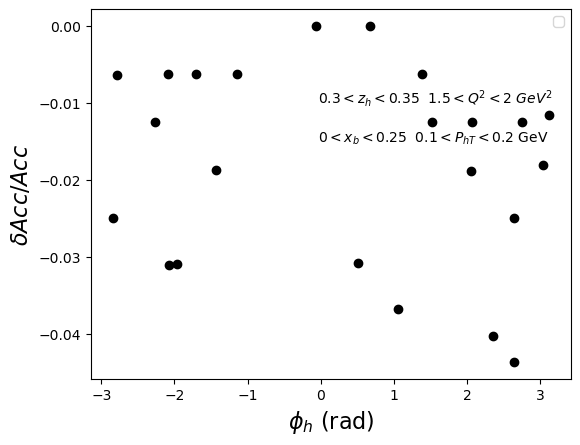

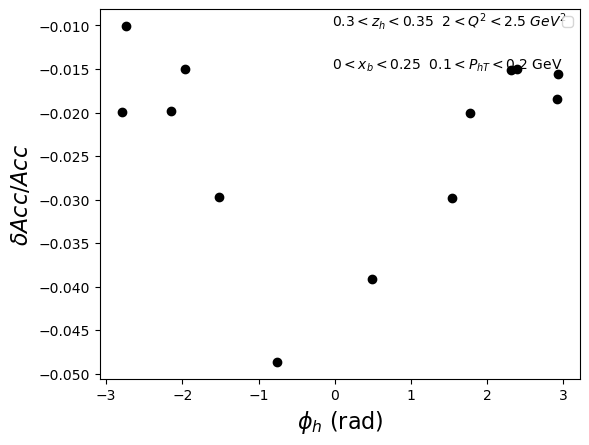

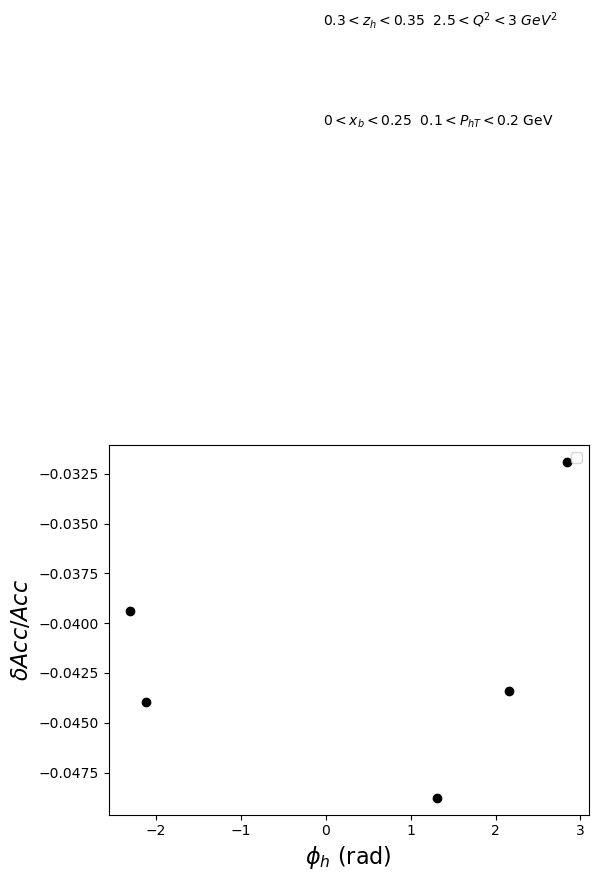

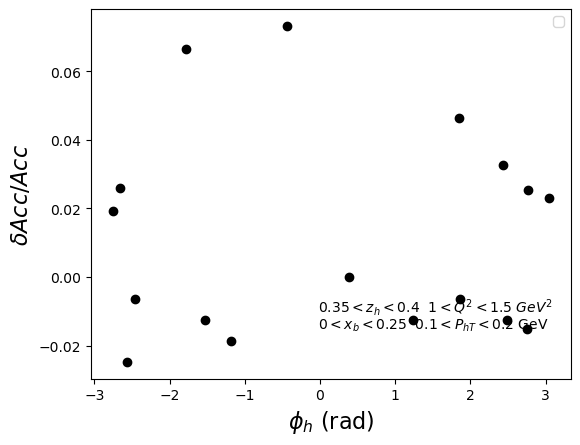

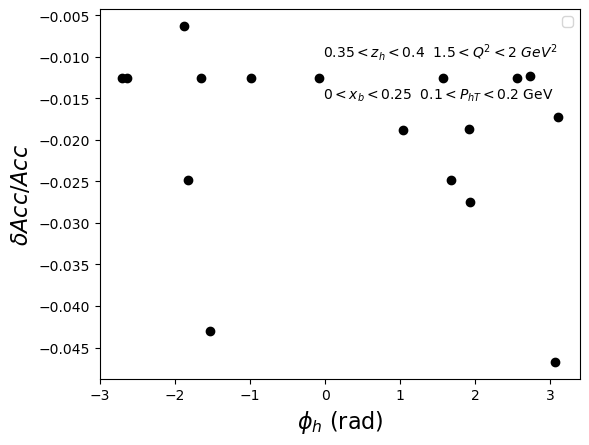

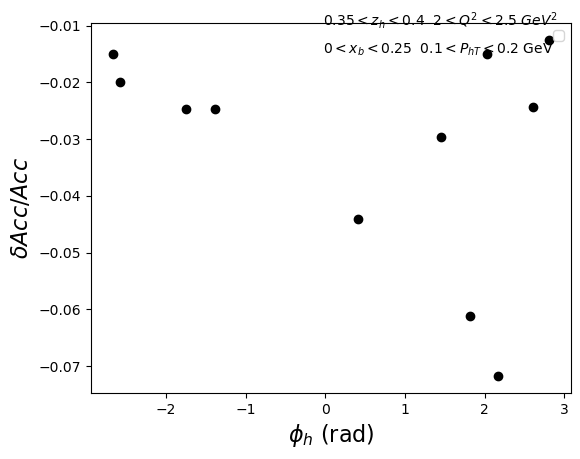

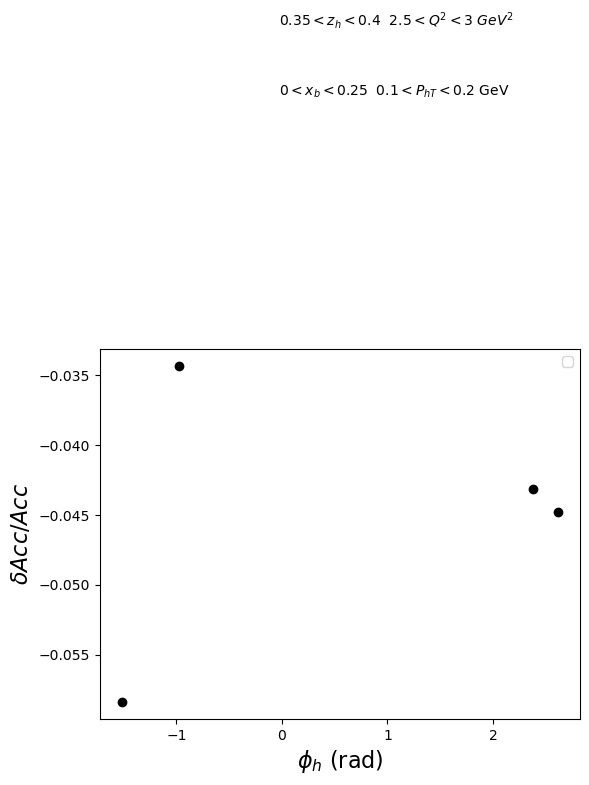

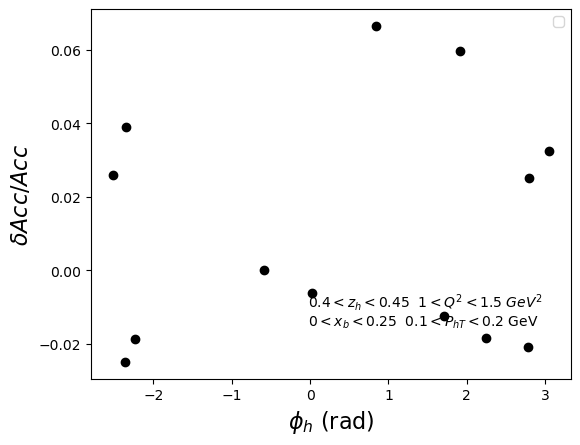

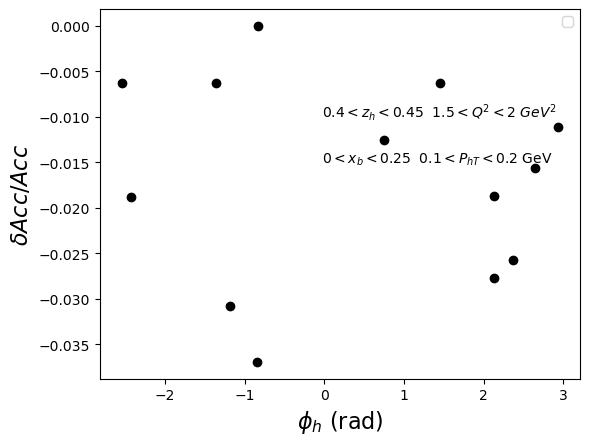

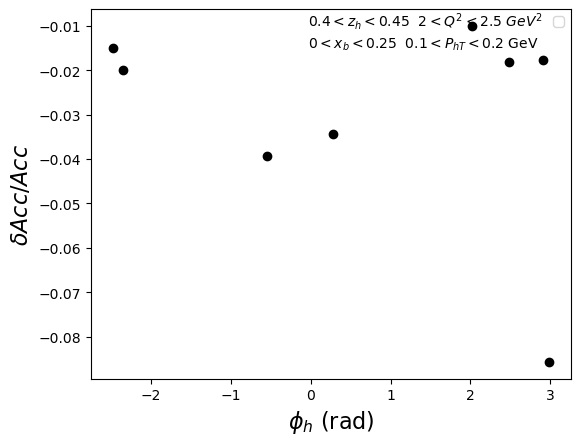

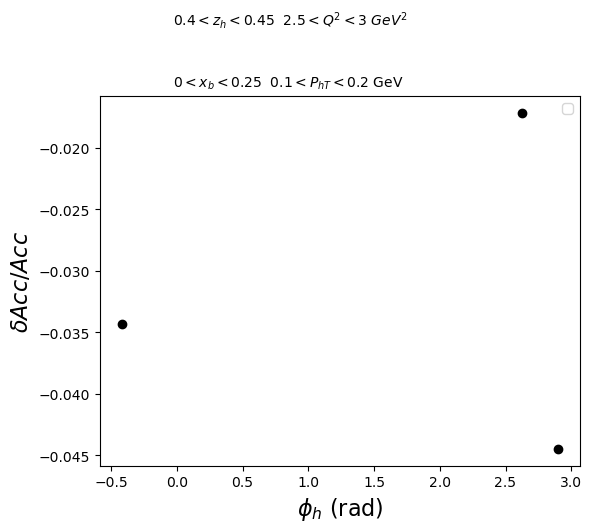

In [9]:
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_pip_dacc_xPtzQ2=df_pip_dacc_xPt[(df_pip_dacc_xPt['z']>z_cuts[i_z-1])&(df_pip_dacc_xPt['z']<z_cuts[i_z])&(df_pip_dacc_xPt['Q2']>Q2_cuts[i_Q2-1])&(df_pip_dacc_xPt['Q2']<Q2_cuts[i_Q2])]
        df_pip_default_xPtzQ2=df_pip_default_xPt[(df_pip_default_xPt['z']>z_cuts[i_z-1])&(df_pip_default_xPt['z']<z_cuts[i_z])&(df_pip_default_xPt['Q2']>Q2_cuts[i_Q2-1])&(df_pip_default_xPt['Q2']<Q2_cuts[i_Q2])]
                
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_dacc = df_pip_dacc_xPtzQ2['phih'].to_list()
        Fuu_dacc = df_pip_dacc_xPtzQ2['stat'].to_list()
        phih_default = df_pip_default_xPtzQ2['phih'].to_list()
        Fuu_default = df_pip_default_xPtzQ2['stat'].to_list()
        print(len(phih_dacc),len(phih_default))
        phih_daccs = []
        phih_defaults = []
        dFuu_daccs = []
        dFuu_defaults = []
        for i_phi in range(0,len(Fuu_dacc)):
            #print(i_phi)
            #print(phih_dacc[i_phi],phih_kT4[i_phi])
            print(phih_dacc[i_phi],phih_default[i_phi])
            iFuu_dacc = Fuu_dacc[i_phi]
            iFuu_default = Fuu_default[i_phi]
            dFuu_dacc=((1/iFuu_dacc)**2-(1/iFuu_default)**2)/(1/iFuu_default)**2            
            print(iFuu_dacc,iFuu_default)
            phih_daccs.append(phih_dacc[i_phi])
            phih_defaults.append(phih_default[i_phi])
            dFuu_daccs.append(dFuu_dacc)
            
            
            
        
        plt.plot(phih_daccs,np.asarray(dFuu_daccs),'ko')
        
        
        plt.text(-0.03,-0.01,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]),fontsize=10)
        plt.text(-0.03,-0.015,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]),fontsize=10)      

        plt.legend()
        plt.xlabel(r'$\phi_h$ (rad)',fontsize=16)
        plt.ylabel(r'$\delta Acc/Acc $',fontsize=16)
        plt.subplots_adjust(left=0.15)
        plt.savefig('acc_results/dacc_z_{}_Q2_{}_xQ2zPt.pdf'.format(i_z,i_Q2))
        #for i_phi in np.asarray(phihs):
        #    print(i_phi)
        #for i_phih in phih_bins:
            #plt.axvline(x=i_phih)

In [10]:
all=8**2+4**2+2**2+3**2+2.5**2+0.6**2+1+2.5**2+3**2
print(np.sqrt(all))

10.763828315241748
